# Exploring Dask Dataframes

In [1]:
import dask.dataframe as df

## dummy_df = df.read_csv('multiple_csvs/*.csv')

In [3]:
dummy_df

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
npartitions=351,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,object,object,object,object,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0645564 to fit


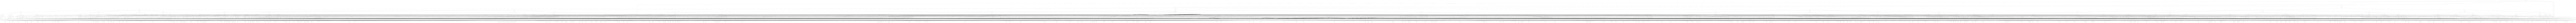

In [4]:
dummy_df.describe().visualize(filename='describe.png')

In [5]:
dummy_df.head()

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,2017-09-01T00:00:00.000,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,2017-09-01T00:00:00.000,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,2017-09-01T00:00:00.000,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,2017-09-01T00:00:00.000,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1


In [6]:
# Currently in 1.2.1 inplace arguement is not supported
dummy_df = dummy_df.drop('Unnamed: 0', axis=1)

ValueError: Metadata inference failed in `drop_by_shallow_copy`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
KeyError("['Unnamed: 0'] not found in axis")

Traceback:
---------
  File "/Users/massimo/Dropbox/Personal Development/00.myEnv/myEnv/lib/python3.7/site-packages/dask/dataframe/utils.py", line 174, in raise_on_meta_error
    yield
  File "/Users/massimo/Dropbox/Personal Development/00.myEnv/myEnv/lib/python3.7/site-packages/dask/dataframe/core.py", line 5165, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "/Users/massimo/Dropbox/Personal Development/00.myEnv/myEnv/lib/python3.7/site-packages/dask/dataframe/utils.py", line 977, in drop_by_shallow_copy
    df2.drop(columns=columns, inplace=True, errors=errors)
  File "/Users/massimo/Dropbox/Personal Development/00.myEnv/myEnv/lib/python3.7/site-packages/pandas/core/frame.py", line 4315, in drop
    errors=errors,
  File "/Users/massimo/Dropbox/Personal Development/00.myEnv/myEnv/lib/python3.7/site-packages/pandas/core/generic.py", line 4153, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "/Users/massimo/Dropbox/Personal Development/00.myEnv/myEnv/lib/python3.7/site-packages/pandas/core/generic.py", line 4188, in _drop_axis
    new_axis = axis.drop(labels, errors=errors)
  File "/Users/massimo/Dropbox/Personal Development/00.myEnv/myEnv/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 5591, in drop
    raise KeyError(f"{labels[mask]} not found in axis")


In [7]:
dummy_df.head()

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,2017-09-01T00:00:00.000,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,2017-09-01T00:00:00.000,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,2017-09-01T00:00:00.000,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,2017-09-01T00:00:00.000,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1


In [8]:
max_gdp_per_country = dummy_df.groupby('country')['gdp'].max()

KeyError: 'country'

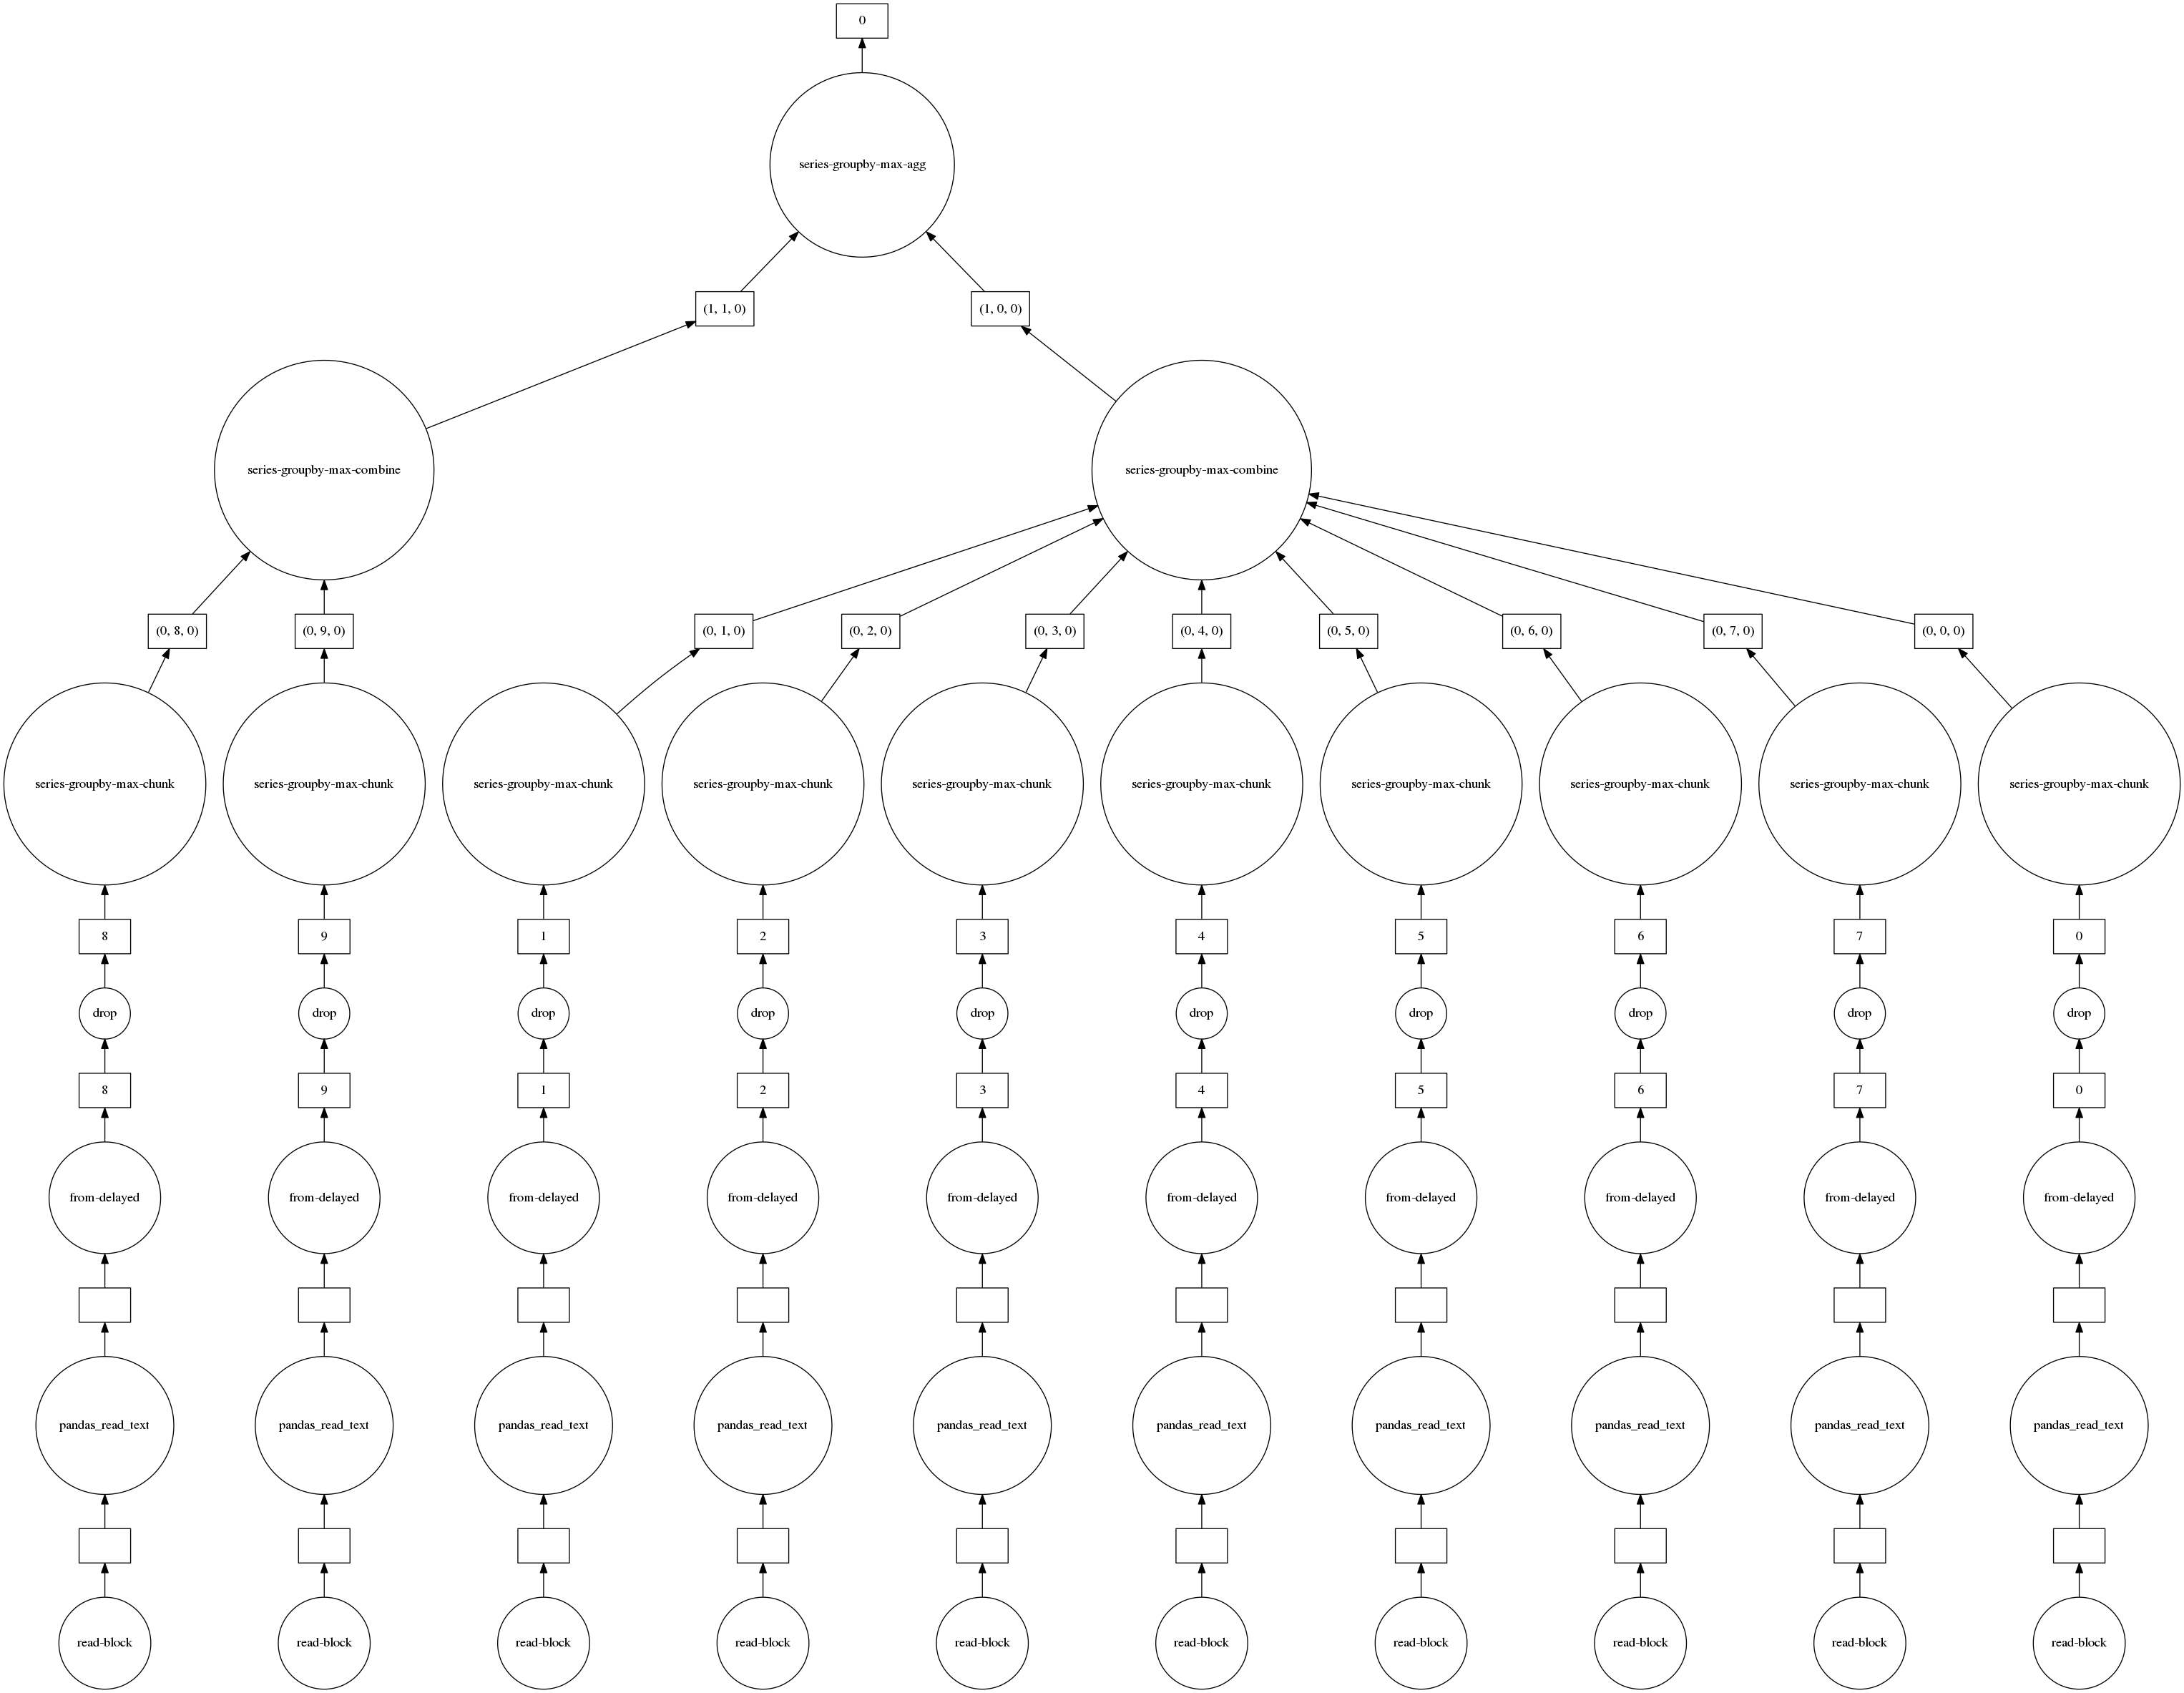

In [9]:
max_gdp_per_country.visualize()

In [10]:
max_gdp_per_country.compute()

country
India             2.650725e+12
United Kingdom    3.074360e+12
Denmark           3.533611e+11
Sweden            5.793607e+11
Singapore         3.239072e+11
Canada            1.842628e+12
France            2.918383e+12
Japan             6.203213e+12
Germany           3.898727e+12
Italy             2.390729e+12
Name: gdp, dtype: float64

In [11]:
dummy_df.nlargest(20, 'gdp').compute()

,country,gdp,year
5,Japan,6.203213e+12,2012
6,Japan,6.157460e+12,2011
7,Japan,5.700098e+12,2010
22,Japan,5.449116e+12,1995
8,Japan,5.231383e+12,2009
4,Japan,5.155717e+12,2013
9,Japan,5.037908e+12,2008
1,Japan,4.949273e+12,2016
23,Japan,4.907039e+12,1994
17,Japan,4.887520e+12,2000


In [12]:
without_japan = dummy_df[dummy_df.country !='Japan']

In [13]:
without_japan.nlargest(20, 'gdp').compute()

,country,gdp,year
3,Germany,3.898727e+12,2014
6,Germany,3.757698e+12,2011
4,Germany,3.752514e+12,2013
9,Germany,3.752366e+12,2008
0,Germany,3.693204e+12,2017
5,Germany,3.543984e+12,2012
1,Germany,3.495163e+12,2016
10,Germany,3.439953e+12,2007
8,Germany,3.418005e+12,2009
7,Germany,3.417095e+12,2010


In [14]:
mask_after_2010 = dummy_df.where(dummy_df['year']>2010)

In [15]:
mask_after_2010.compute()

,country,gdp,year
0,India,2.650725e+12,2017.0
1,India,2.290432e+12,2016.0
2,India,2.103588e+12,2015.0
3,India,2.039127e+12,2014.0
4,India,1.856722e+12,2013.0
5,India,1.827638e+12,2012.0
6,India,1.823050e+12,2011.0
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [16]:
def add_some_text(cname, *args, **kwargs):
    return "Country name is " + cname

dummy_values = dummy_df['country'].apply(add_some_text, axis=1)

/home/kashif/.local/lib/python3.7/site-packages/dask/dataframe/core.py:2344: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('country', 'object'))

  warnings.warn(meta_warning(meta))


In [17]:
dummy_values

Dask Series Structure:
npartitions=10
    object
       ...
     ...  
       ...
       ...
Name: country, dtype: object
Dask Name: apply, 60 tasks

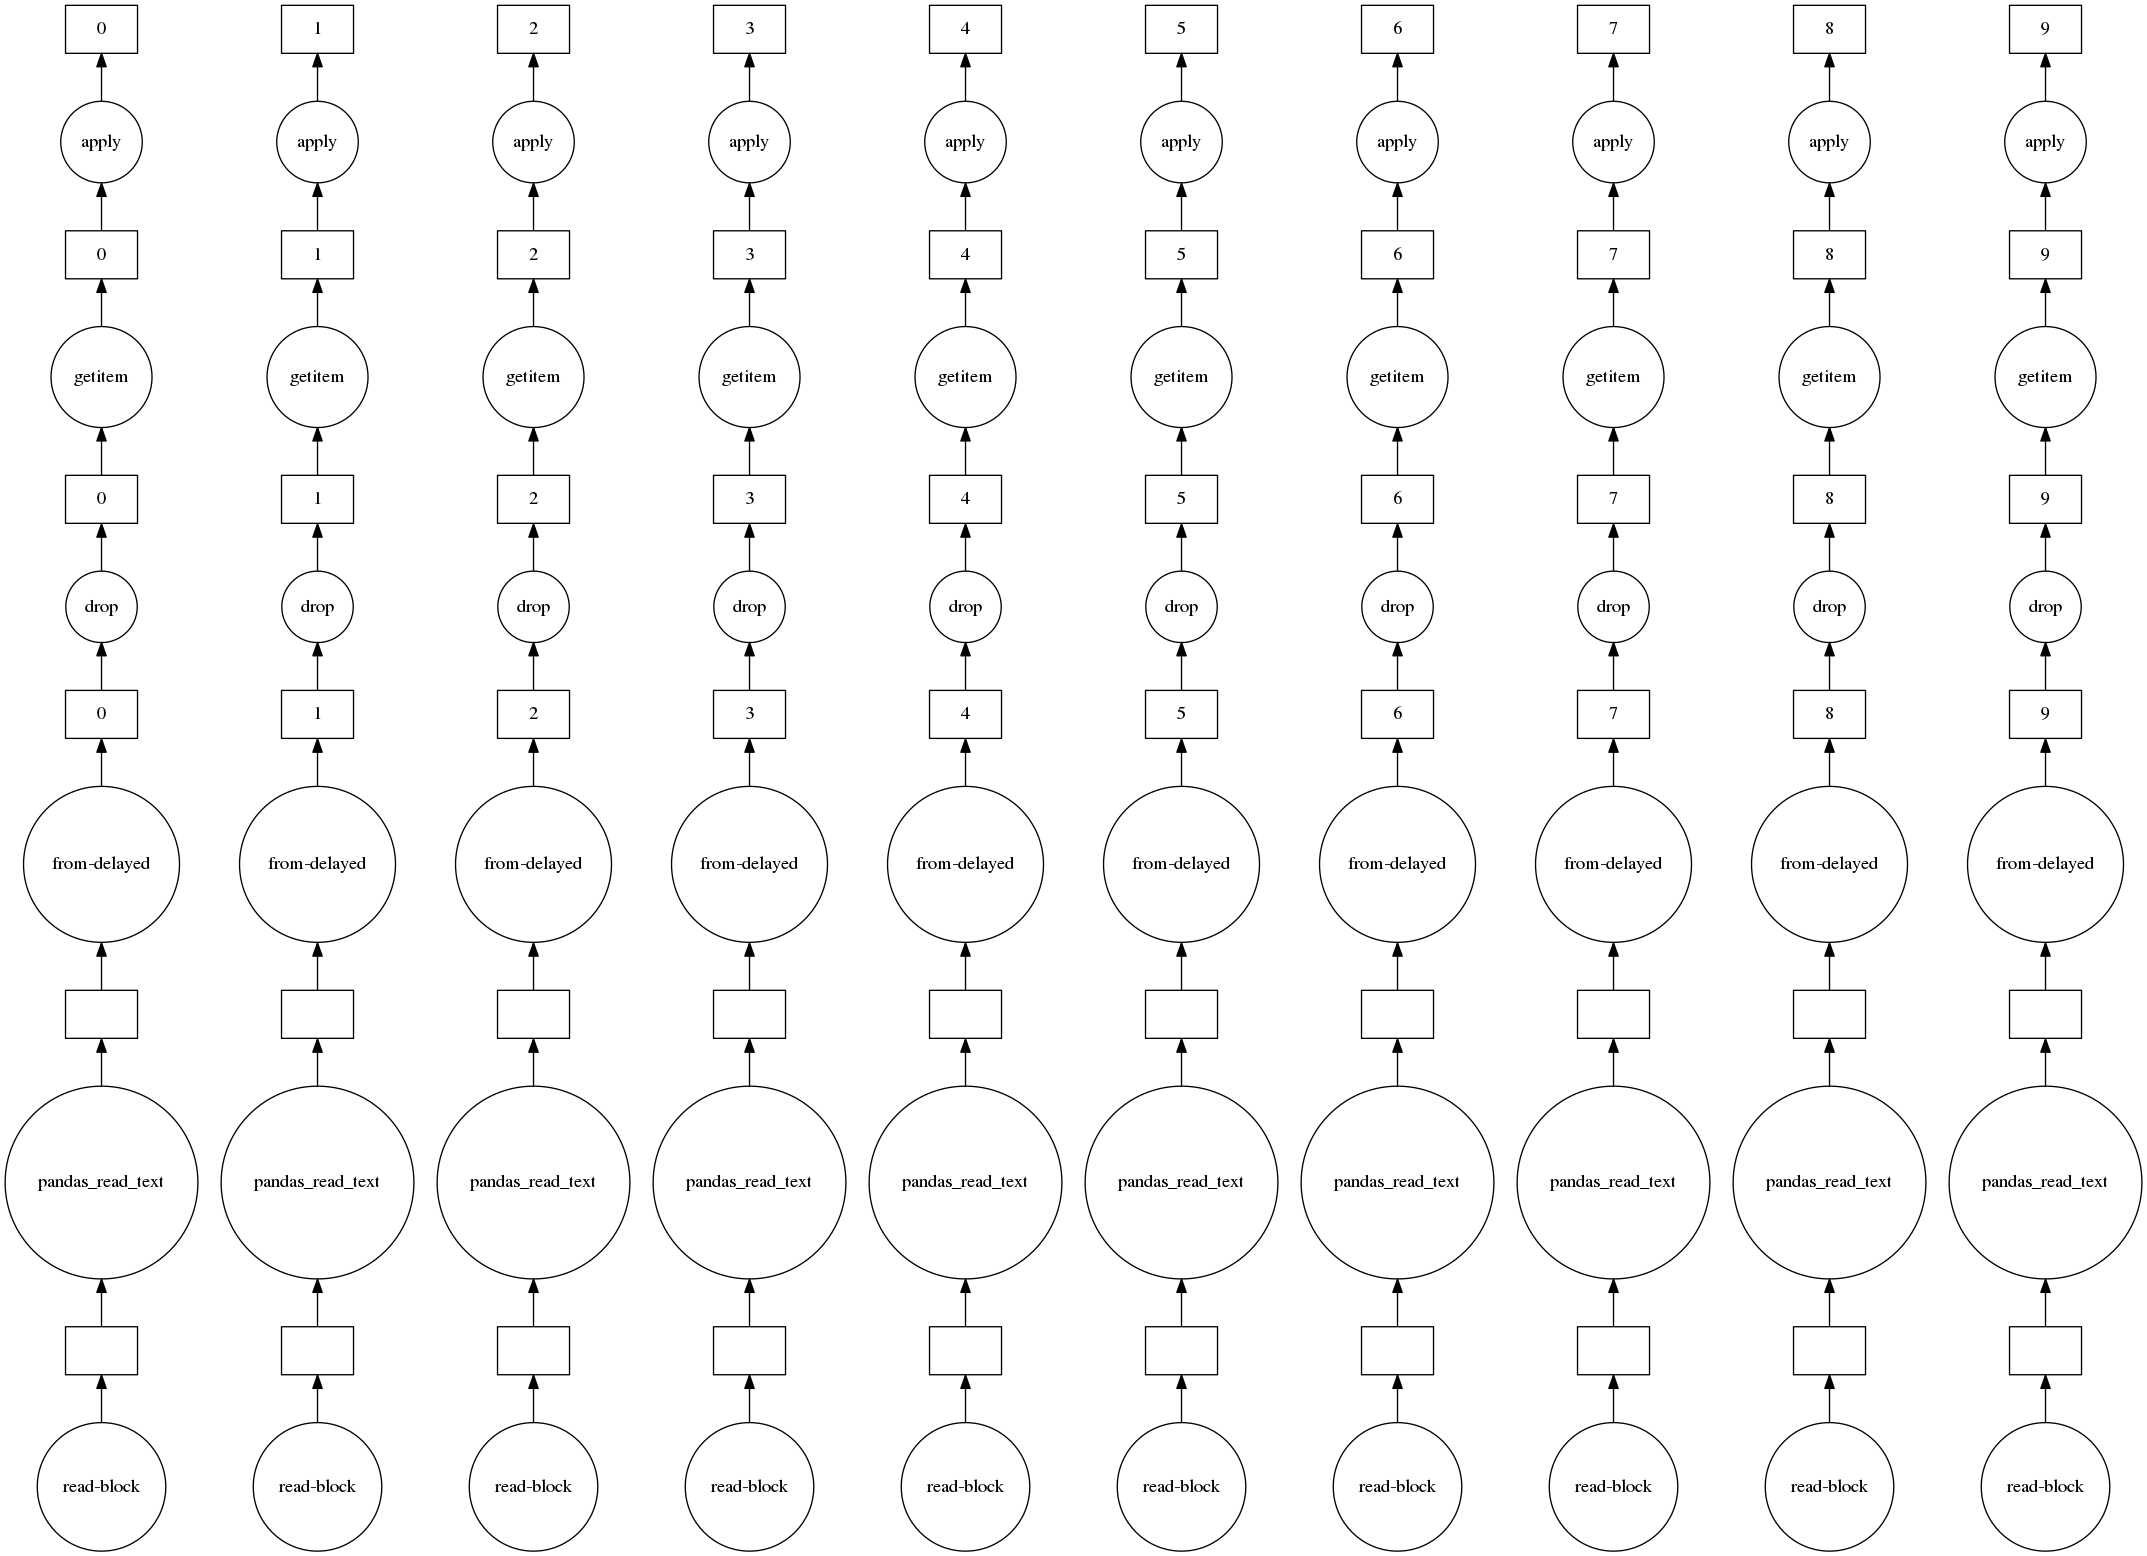

In [18]:
dummy_values.visualize()

In [19]:
dummy_values.compute()

0     Country name is India
1     Country name is India
2     Country name is India
3     Country name is India
4     Country name is India
5     Country name is India
6     Country name is India
7     Country name is India
8     Country name is India
9     Country name is India
10    Country name is India
11    Country name is India
12    Country name is India
13    Country name is India
14    Country name is India
15    Country name is India
16    Country name is India
17    Country name is India
18    Country name is India
19    Country name is India
20    Country name is India
21    Country name is India
22    Country name is India
23    Country name is India
24    Country name is India
25    Country name is India
26    Country name is India
27    Country name is India
28    Country name is India
29    Country name is India
              ...          
28    Country name is Italy
29    Country name is Italy
30    Country name is Italy
31    Country name is Italy
32    Country name i

In [20]:
max_per_country_yr = dummy_df.groupby('country').apply(lambda x: x.loc[x['gdp'].idxmax(), 'year'])

/home/kashif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  """Entry point for launching an IPython kernel.


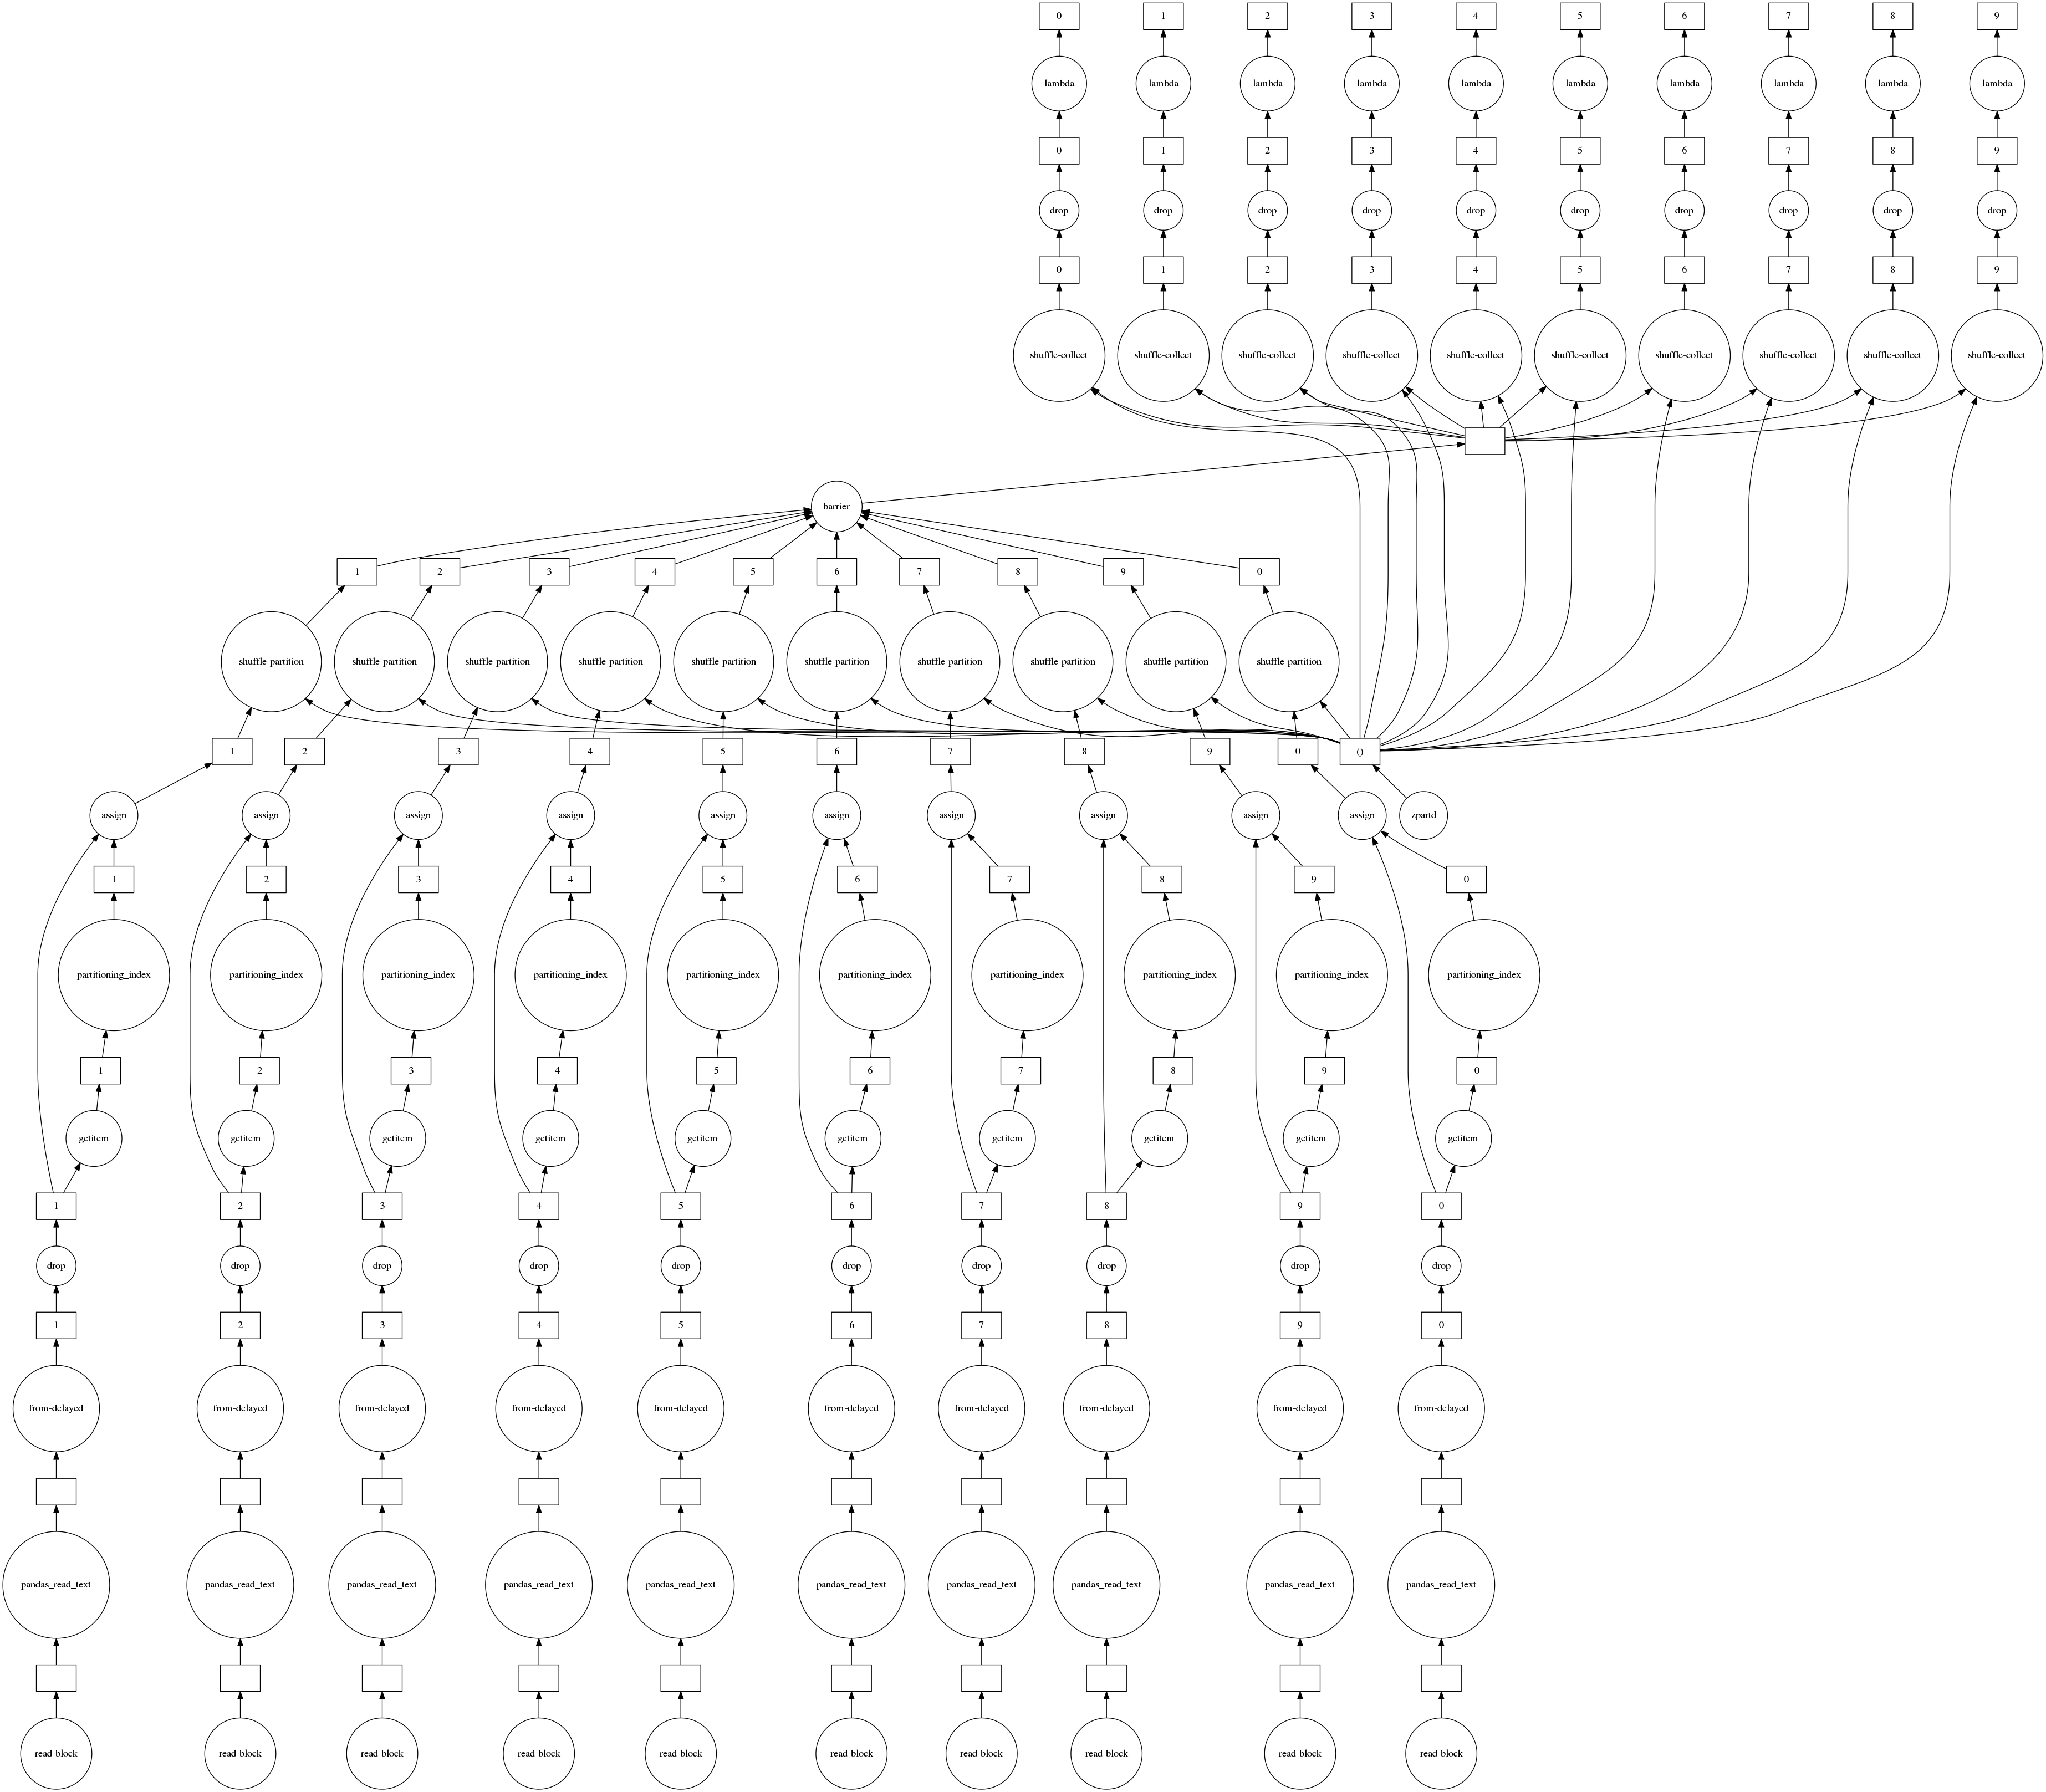

In [22]:
max_per_country_yr.visualize()

In [21]:
max_per_country_yr.compute()

country
France            2008
Italy             2008
Sweden            2013
Canada            2013
Germany           2014
Japan             2012
United Kingdom    2007
Denmark           2008
India             2017
Singapore         2017
dtype: int64